In [ ]:
  %matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
!pip install graphviz

In [ ]:
credit_df = pd.read_csv("credit.csv")
print(credit_df.isnull().any())

checking_balance        False
months_loan_duration    False
credit_history          False
purpose                 False
amount                  False
savings_balance         False
employment_duration     False
percent_of_income       False
years_at_residence      False
age                     False
other_credit            False
housing                 False
existing_loans_count    False
job                     False
dependents              False
phone                   False
default                 False
dtype: bool


In [ ]:
credit_df.head(10)


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [ ]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [ ]:
credit_df.shape

(1000, 17)

In [ ]:
credit_df.describe(include=[np.number])

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
for feature in credit_df.columns:
    if credit_df[feature].dtype == 'object':
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes


In [ ]:
import seaborn as sns
sns.pairplot(credit_df, hue = "default")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
col_labels = [...]
train_char_label = ['No', 'Yes']


In [ ]:
X = credit_df.drop("default" , axis=1)
y = credit_df.pop("default")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, train_labels)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.117763
months_loan_duration  0.081035
credit_history        0.064064
purpose               0.074438
amount                0.186758
savings_balance       0.071517
employment_duration   0.046322
percent_of_income     0.041458
years_at_residence    0.038859
age                   0.126408
other_credit          0.049003
housing               0.013220
existing_loans_count  0.024294
job                   0.023043
dependents            0.031387
phone                 0.010430


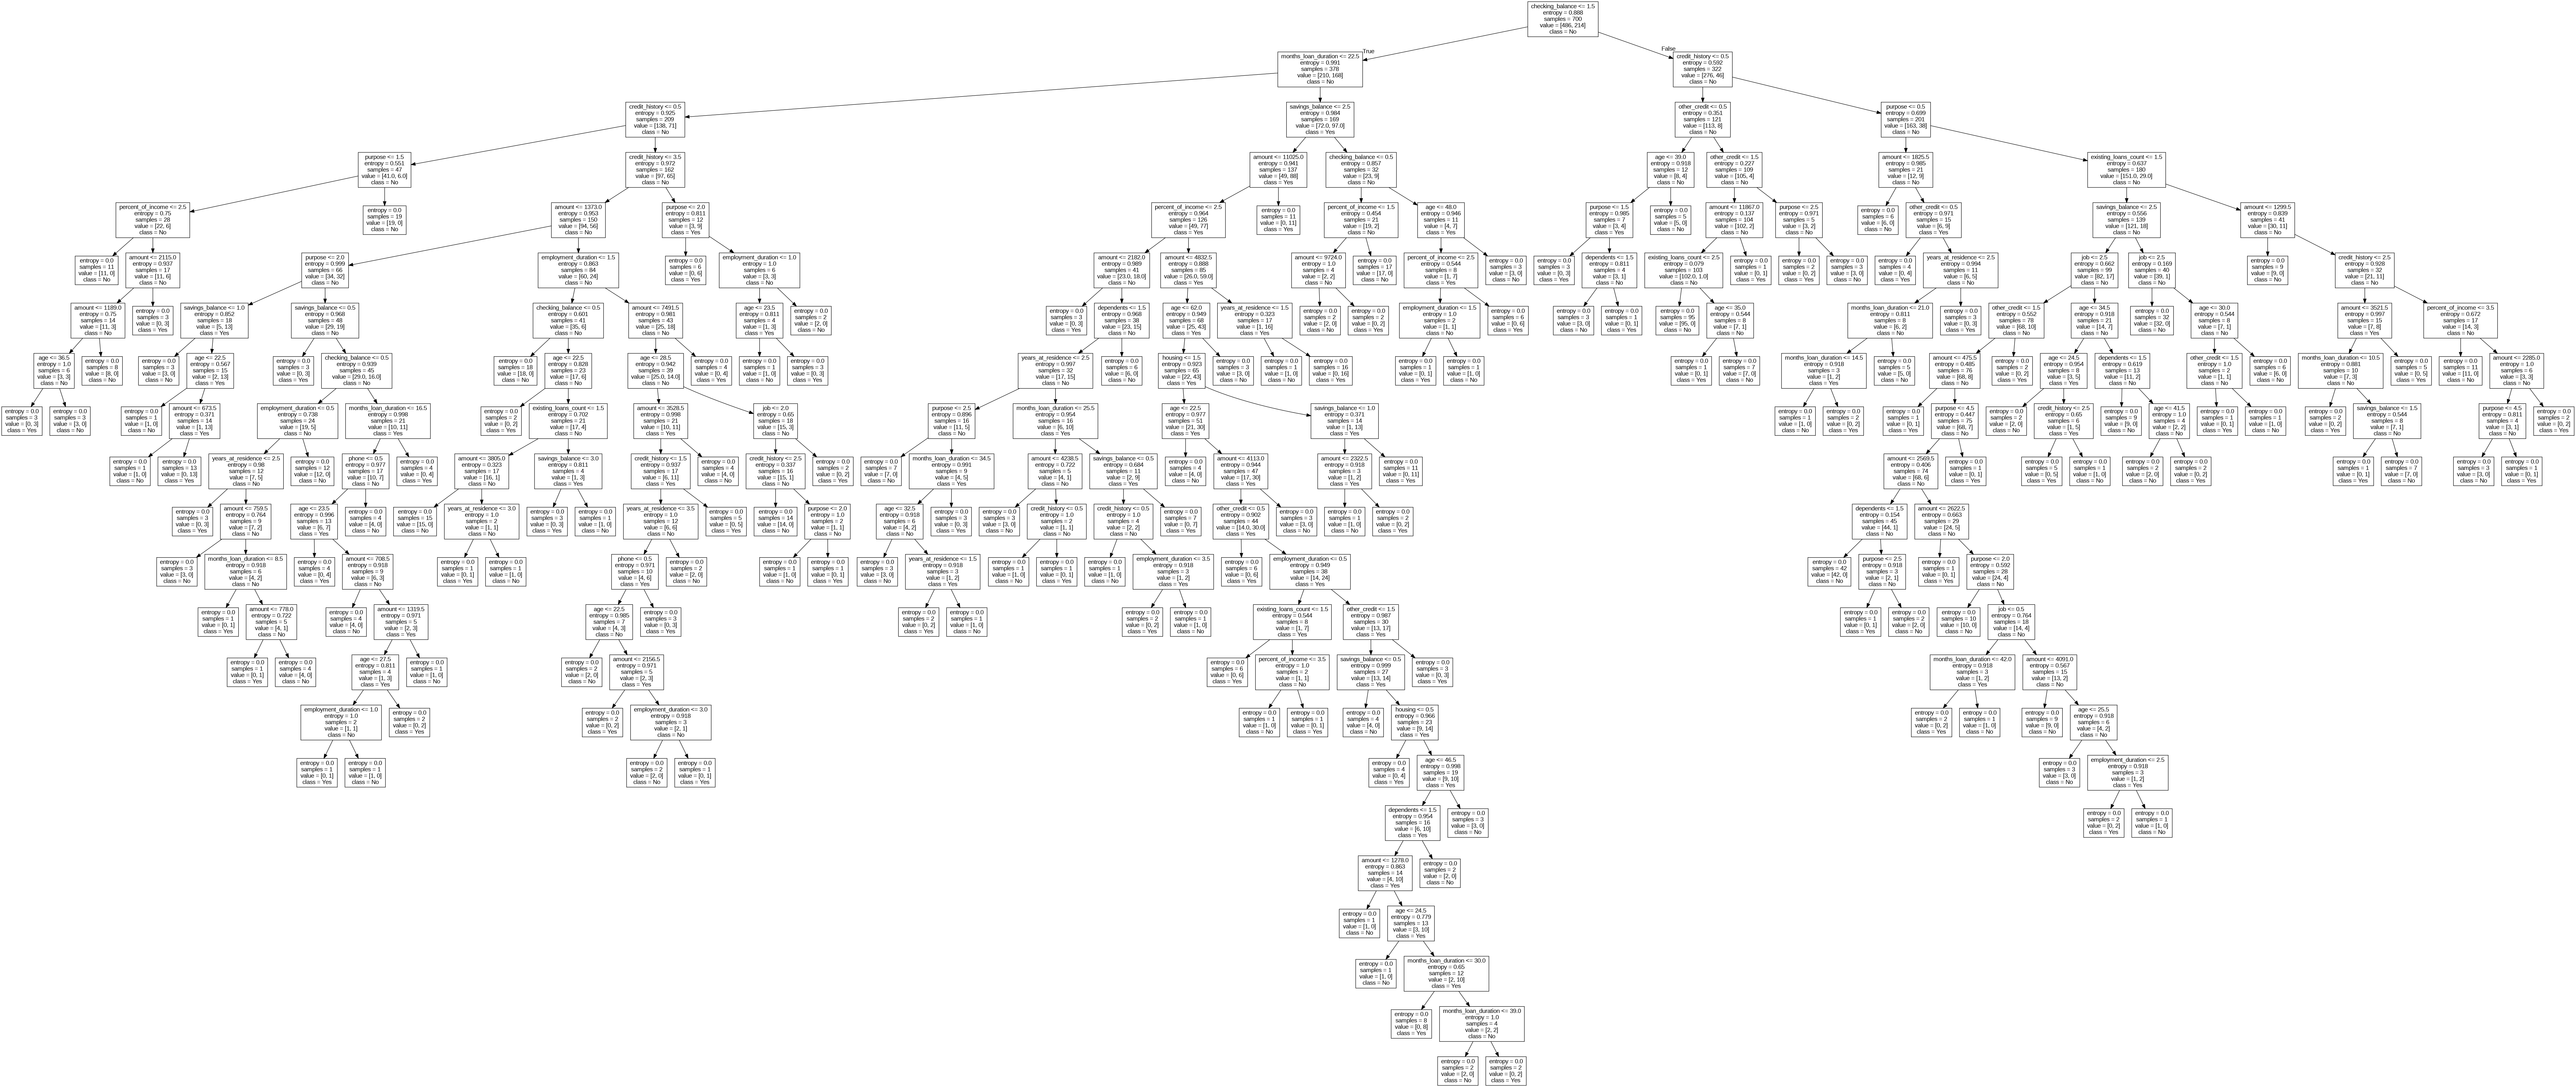

In [ ]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
#or create a .png as below

system("dot -Tpng credit_tree.dot -o credit_tree.png")
Image("credit_tree.png")

In [ ]:
y_predict = dt_model.predict(X_test)
print(dt_model.score(X_train , train_labels))
print(dt_model.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))


1.0
0.6666666666666666
[[167  47]
 [ 53  33]]


In [ ]:

reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
reg_dt_model.fit(X_train, train_labels)


DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [ ]:
print("Model Hyperparameters:")
print(reg_dt_model.get_params())

Model Hyperparameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [ ]:
credit_tree_regularized = open('credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.117763
months_loan_duration  0.081035
credit_history        0.064064
purpose               0.074438
amount                0.186758
savings_balance       0.071517
employment_duration   0.046322
percent_of_income     0.041458
years_at_residence    0.038859
age                   0.126408
other_credit          0.049003
housing               0.013220
existing_loans_count  0.024294
job                   0.023043
dependents            0.031387
phone                 0.010430


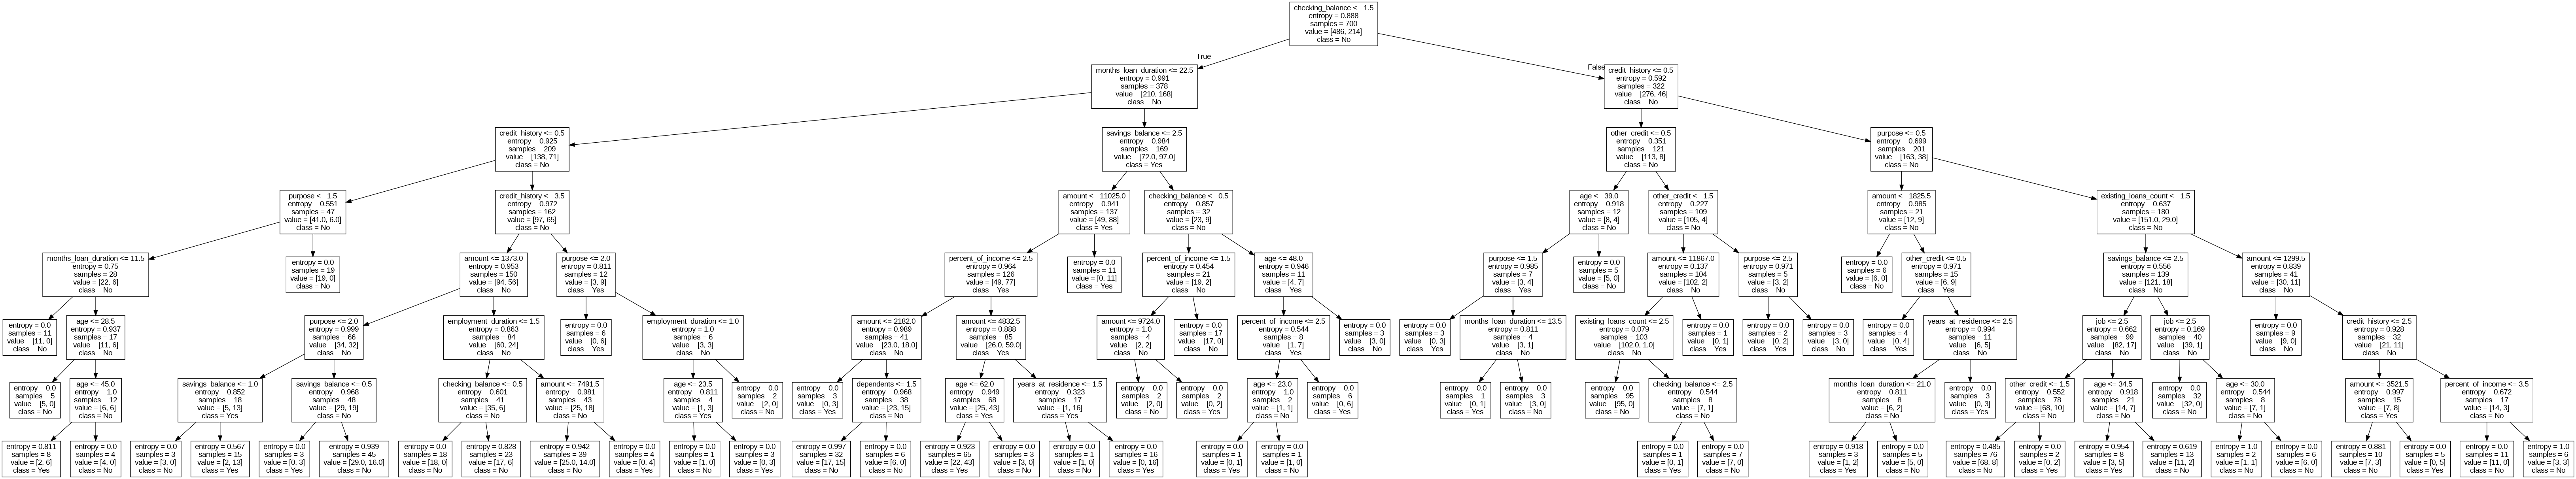

In [ ]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng credit_tree_regularized.dot -o credit_tree_regularized.png")
Image("credit_tree_regularized.png")

In [ ]:
y_predict = reg_dt_model.predict(X_test)
print(reg_dt_model.score(X_train , train_labels))
print(reg_dt_model.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.86
0.7066666666666667
[[173  41]
 [ 47  39]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming you already have:
# y_predict = reg_dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(test_labels, y_predict)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(test_labels, y_predict)
print("Precision:", precision)

# Recall
recall = recall_score(test_labels, y_predict)
print("Recall:", recall)

# F1 Score
f1 = f1_score(test_labels, y_predict)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(test_labels, y_predict)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, y_predict))


Accuracy: 0.7066666666666667
Precision: 0.4875
Recall: 0.45348837209302323
F1 Score: 0.46987951807228917
Confusion Matrix:
 [[173  41]
 [ 47  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       214
           1       0.49      0.45      0.47        86

    accuracy                           0.71       300
   macro avg       0.64      0.63      0.63       300
weighted avg       0.70      0.71      0.70       300



In [ ]:
!ls /content



credit.csv	 credit_tree.png	      credit_tree_regularized.png
credit_tree.dot  credit_tree_regularized.dot  sample_data


In [ ]:
from google.colab import files
files.download('/content/credit_tree.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
